In [16]:
import redis; import numpy as np; import cv2; import json; from matplotlib import pyplot as plt

img1 = cv2.imread('/Users/averagehat/video-synth/rpi/opencv/samples/data/graf3.png')
img2 = cv2.imread('/Users/averagehat/video-synth/rpi/opencv/samples/data/ml.png')
# img2 = cv2.resize(_img2, img1.shape[:2][::-1])
print(f'shapes: {img1.shape} {img2.shape}') # create circle mask, center, radius, fill color, size of the border # cv2.circle(mask,(r,r), r, (255,255,255),-1)
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 240, 255, cv2.THRESH_BINARY)
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = ~mask)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst


shapes: (640, 800, 3) (380, 308, 3)


In [17]:

logo = cv2.imread('/Users/averagehat/video-synth/rpi/opencv/samples/data/opencv-logo-white.png')
logo2gray = cv2.cvtColor(logo,cv2.COLOR_BGR2GRAY)

logo2gray        = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
#plt.subplot(122),plt.imshow(logo2gray),plt.title('Final')


cv2.imshow('yeah', img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
res.shape, logo.shape

((222, 180, 3), (222, 180, 3))

In [49]:
# >>> green = np.uint8([[[0,255,0 ]]])
# >>> hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
# >>> print hsv_green
# [[[ 60 255 255]]]
# Now you take [H-10, 100,100] and [H+10, 255, 255]
# Convert BGR to HSV
hsv = cv2.cvtColor(logo, cv2.COLOR_BGR2HSV)

# define range of blue color in HSV
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(logo,logo, mask= mask)

# res = (logo | [ 60, 255, 255])
coloured = logo.copy()
coloured[mask == 255] = (0, 255, 255)
# res = cv2.bitwise_and(logo,np.array([0, 0, 255]), mask= mask)

# cv2.namedWindow("Channels")
# cv2.imshow("Channels", image_channels)
# 
# cv2.namedWindow("Main")
# cv2.imshow("Main", image_main)
# cv2.imshow('recolored',coloured)
cv2.imshow('recolored', np.vstack( (logo, mask, res)))
#cv2.imshow('frame',logo)
#cv2.imshow('mask',mask)
#cv2.imshow('res',res)
k = cv2.waitKey(0)
cv2.destroyAllWindows()


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 2 dimension(s)

In [43]:
frame = logo
# Take each frame
# Convert BGR to HSV
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# define range of blue color in HSV
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(frame,frame, mask= mask)

cv2.imshow('frame',frame)
cv2.imshow('mask',mask)
cv2.imshow('res',res)
k = cv2.waitKey(0)
cv2.destroyAllWindows()

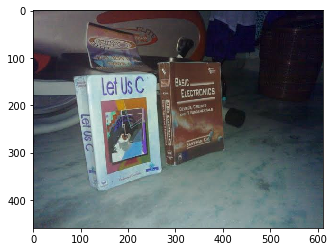

In [28]:
plt.imshow(img1)

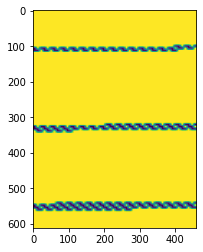

In [24]:
# plt.imshow(img2.resize(img1.shape[:2]))
resized_image = cv2.resize(img2, img1.shape[:2]) 

plt.imshow(resized_image)

# plt.subplot(122),plt.imshow(final),plt.title('Final')

In [8]:
ls -lh /Users/averagehat/video-synth/rpi/opencv/samples/data/

total 42272
-rw-r--r--  1 averagehat  staff    25K Dec 30 11:49 Blender_Suzanne1.jpg
-rw-r--r--  1 averagehat  staff    25K Dec 30 11:49 Blender_Suzanne2.jpg
-rwxr-xr-x  1 averagehat  staff   298B Dec 30 11:49 H1to3p.xml*
-rwxr-xr-x  1 averagehat  staff   8.1K Dec 30 11:49 HappyFish.jpg*
-rwxr-xr-x  1 averagehat  staff   6.8K Dec 30 11:49 LinuxLogo.jpg*
-rw-r--r--  1 averagehat  staff   1.1M Dec 30 11:49 Megamind.avi
-rw-r--r--  1 averagehat  staff   841K Dec 30 11:49 Megamind_bugy.avi
-rwxr-xr-x  1 averagehat  staff    11K Dec 30 11:49 WindowsLogo.jpg*
-rw-r--r--  1 averagehat  staff    59K Dec 30 11:49 aero1.jpg
-rw-r--r--  1 averagehat  staff    52K Dec 30 11:49 aero3.jpg
-rw-r--r--  1 averagehat  staff    97K Dec 30 11:49 aloeGT.png
-rw-r--r--  1 averagehat  staff   308K Dec 30 11:49 aloeL.jpg
-rw-r--r--  1 averagehat  staff   308K Dec 30 11:49 aloeR.jpg
-rw-r--r--  1 averagehat  staff    50K Dec 30 11:49 apple.jpg
-rw-r--r--  1 averagehat  staff   176K Dec 30 11:49 baboon.jpg
-rw-